In [2]:
import pandas as pd
import seaborn as sns

In [3]:
insurance_data = pd.read_csv("../insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

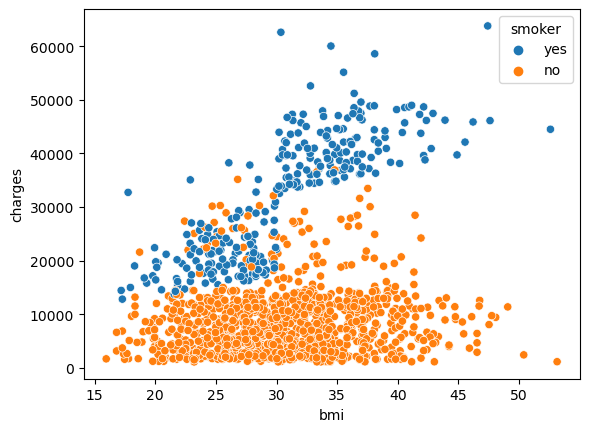

In [4]:
sns.scatterplot(x=insurance_data["bmi"],y=insurance_data["charges"],hue=insurance_data["smoker"])

In [5]:
x = insurance_data.drop(columns=["charges","region"])
y = insurance_data["charges"]

In [6]:
x.head()

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no


In [7]:
x["sex"] = x["sex"].map({"female" : 1 , "male" : 0})
x["smoker"] = x["smoker"].map({"yes" : 1 , "no" : 0})

In [8]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
#predict values
y_pred = model.predict(x_test)

In [ ]:
y_pred

In [24]:
from sklearn.metrics import r2_score
#predict values
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
print("r-squared: ",r2 )
n = x_test.shape[0]
p = x_test.shape[1]

adjusted_r2 = 1 -( (1-r2) * (n-1)/(n-p-1)) 
print(adjusted_r2)

r-squared:  0.8652316979531681
0.8594408724745933


In [16]:
# Feature Engineering
# One Hot Encoding
x = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]
x = pd.get_dummies(x,columns=["region"],drop_first=False,dtype=int)
x["sex"] = x["sex"].map({"female":1 , "male":0})
x["smoker"] = x["smoker"].map({"yes":1,"no" : 0})

In [17]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [26]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("r-squared: ",r2 )
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1 -( (1-r2) * (n-1)/(n-p-1)) 
print(adjusted_r2)

r-squared:  0.8652316979531681
0.8594408724745933


In [25]:
x["age_smoker"] = x["age"] * x["smoker"] + x["age"]
x["bmi-smoker"] = x["bmi"] * x["smoker"] + x["bmi"]


In [23]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age_smoker,bmi-smoker
0,19,1,27.900,0,1,0,0,0,1,19,27.90
1,18,0,33.770,1,0,0,0,1,0,0,0.00
2,28,0,33.000,3,0,0,0,1,0,0,0.00
3,33,0,22.705,0,0,0,1,0,0,0,0.00
4,32,0,28.880,0,0,0,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0,0,0.00
1334,18,1,31.920,0,0,1,0,0,0,0,0.00
1335,18,1,36.850,0,0,0,0,1,0,0,0.00
1336,21,1,25.800,0,0,0,0,0,1,0,0.00
